In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load datasets
df_sentiment = pd.read_csv('/content/fear_greed_index.csv')
df_trades = pd.read_csv('/content/historical_data.csv')


In [ ]:
#3. Clean and prepare data
df_sentiment.columns = df_sentiment.columns.str.lower().str.strip().str.replace(" ", "_")
df_trades.columns = df_trades.columns.str.lower().str.strip().str.replace(" ", "_")

df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], errors='coerce')
df_sentiment['date_only'] = df_sentiment['date'].dt.date

df_trades['timestamp_ist'] = pd.to_datetime(df_trades['timestamp_ist'], errors='coerce')
df_trades['trade_date'] = df_trades['timestamp_ist'].dt.date


In [ ]:
#4. Merge datasets
df_merged = pd.merge(df_trades, df_sentiment, left_on='trade_date', right_on='date_only', how='left')
df_merged.drop(columns=['date', 'date_only'], inplace=True)


In [26]:
df_merged.to_csv('merged_trader_sentiment.csv', index=False)


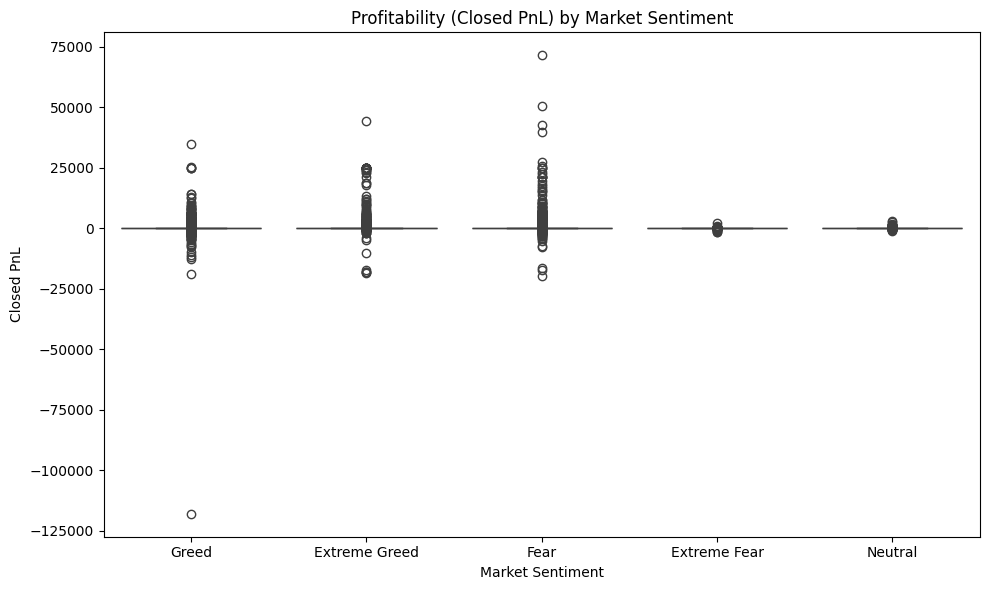

In [ ]:
#5. EDA – Visual Graphs

#5.1 Profitability vs Market Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='closed_pnl', data=df_merged)
plt.title('Profitability (Closed PnL) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

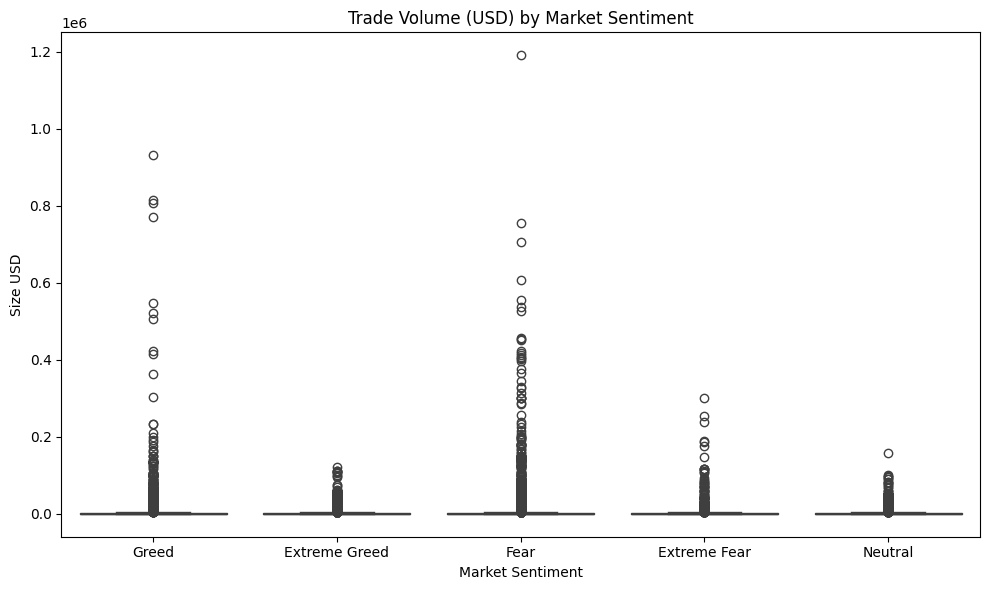

In [ ]:
#5.2 Trade Volume vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='size_usd', data=df_merged)
plt.title('Trade Volume (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Size USD')
plt.tight_layout()
plt.show()



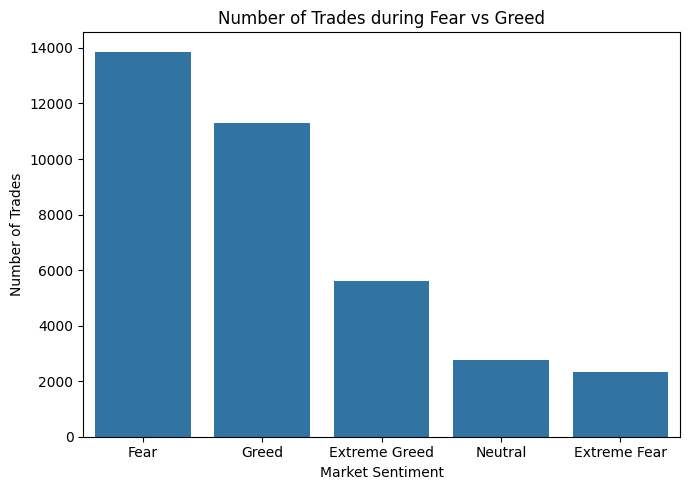

In [ ]:
#5.3Trade Count by Sentiment
plt.figure(figsize=(7, 5))
sns.countplot(x='classification', data=df_merged, order=df_merged['classification'].value_counts().index)
plt.title('Number of Trades during Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()
